In [47]:
"""
Consider a grid in d-dimensional space. 
There are n grid lines in each dimension, spaced one unit apart. 
We will consider a walk of m steps from grid intersection to grid intersection. 
Each step will be a single unit movement in any one of the dimensions, such that it stays on the grid. 
We wish to look at the number of possible paths from a particular starting location on this grid.

"""
import numpy as np
from itertools import product

n = 3 # Number of grid lines
d = 2 # Number of dimensions
m = 2 # Number of moves

def traverse_nodes(neighbor_list, start, length, paths, path=[], showPath=False):
    path = path + [start]
    
    if len(path) == length+1:
        if showPath:
            print(path)
        paths.append(path)
    else:
        for node in neighbor_list[str(start)]:
            traverse_nodes(neighbor_list, node, length, paths, path, showPath)

def compute_paths(nDims, nGridLines, nMoves, start, showPath=False):
        
    # Generate node list 
    nodes = [node for node in product(range(0, nGridLines), repeat=nDims)]
    nodes = np.asarray(nodes)
    
    # Calculate the distances to each nearest neighbor, dnn
    dnn = []
    for inode, anode in enumerate(nodes):
        dnn.append(np.linalg.norm(np.asarray(anode) - np.asarray(nodes), axis=1))
    dnn = np.asarray(dnn)
    
    # Create a boolean mask where true values are valid neighbors
    isnn = np.zeros(dnn.shape, dtype=bool)
    isnn[dnn==1] = True
    
    # Create nearest neighbor dictionary where each key-value pair is a node and its respective neighbors
    nn = {}
    for irow, row in enumerate(isnn):
        nn[str(nodes[irow])] = nodes[row]

    paths = []
    traverse_nodes(nn, start, nMoves, paths, path=[], showPath=showPath)
    
    print("When the dimension d = {},".format(nDims))
    print("the number of grid lines n = {},".format(nGridLines))
    print("the number of allowed moves m = {},".format(nMoves))
    outtext = "and the starting position is " + str(start)
    print(outtext)
    print("There are {} possible moves.".format(len(paths)))
    
    return paths
    
    
## Generate list of nodes 
#nodes = [node for node in product(range(0, n), repeat=d)]
#nodes = np.asarray(nodes)
#print("There are {} nodes with coordinates: \n{}.".format(len(nodes), nodes))

# Calculate the distances to each nearest neighbor, dnn
#dnn = []
#for inode, anode in enumerate(nodes):
#    dnn.append(np.linalg.norm(np.asarray(anode) - np.asarray(nodes), axis=1))
#dnn = np.asarray(dnn)

# Create a boolean mask where true values are valid neighbors
#isnn = np.zeros(dnn.shape, dtype=bool)
#isnn[dnn==1] = True

# Create nearest neighbor dictionary where each key-value pair is a node and its respective neighbors
#nn = {}
#for irow, row in enumerate(isnn):
#    nn[str(nodes[irow])] = nodes[row]


            
#paths = []
#nn['[0 0]']
#nn[str(nodes[0])]

#traverse_nodes(nn, nodes[0], m, paths)
#print("There are {} paths with nodes {}".format(len(paths), paths))

start=np.array([0, 0])
paths1 = compute_paths(d, n, m, start, showPath=True)

#print(start)

[array([0, 0]), array([0, 1]), array([0, 0])]
[array([0, 0]), array([0, 1]), array([0, 2])]
[array([0, 0]), array([0, 1]), array([1, 1])]
[array([0, 0]), array([1, 0]), array([0, 0])]
[array([0, 0]), array([1, 0]), array([1, 1])]
[array([0, 0]), array([1, 0]), array([2, 0])]
When the dimension d = 2,
the number of grid lines n = 3,
the number of allowed moves m = 2,
and the starting position is [0 0]
There are 6 possible moves.


In [20]:
"""
    Consider the case where d=4, n=10, and m=10.
    How many valid walks start from the corner (0, 0, 0, 0)?
"""
n2 = 10 # Number of grid lines
d2 = 4 # Number of dimensions
m2 = 10 # Number of moves
start2 = np.array([0, 0, 0, 0])

paths2 = compute_paths(d2, n2, m2, start2, showPath=False)

KeyboardInterrupt: 

In [ ]:
nodes[0]

In [ ]:
nn

In [ ]:
results = [ele for ele in product(range(0, n), repeat = d)]

In [ ]:
results

In [ ]:
results[0]

In [ ]:
results[8]

In [ ]:
a = product(range(0, n), repeat = 2)

In [ ]:
a

In [ ]:
for element in product(range(0, n), repeat = d):
    print(element)

/Users/dalixwill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


3514.619471757469
[    18    109    665   4043  24570 149307 907306]


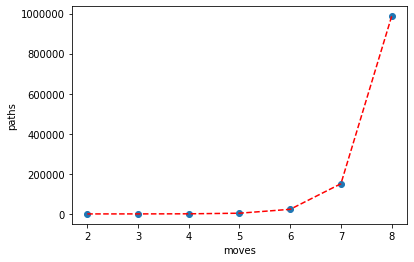

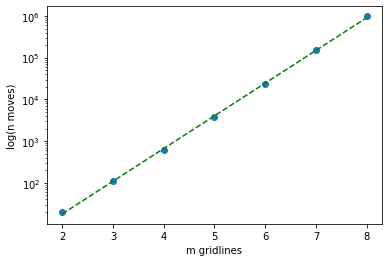

In [41]:
from scipy.optimize import curve_fit

def my_fun(x, A, B):
    return A*np.exp(B*x)


m = np.array([2, 3, 4, 5, 6, 7, 8])
moves = np.array([20, 108, 624, 3760, 23480, 150500, 986440])
popt, pcov = curve_fit(my_fun, m, moves)

np.polyfit(m, np.log(moves), 1)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(m, moves, 'o')
plt.plot(m, my_fun(m, *popt), 'r--')
plt.xlabel('moves')
plt.ylabel('paths')

# Can we estimate this value for significantly larger m?
nmoves = my_fun(5, *popt)
print(nmoves)

p = np.polyfit(m, np.log(moves), 1)
plt.figure()
plt.semilogy(m, moves, 'o')
plt.plot(m, np.exp(p[0]*m + p[1]), 'g--')
plt.xlabel('m gridlines')
plt.ylabel('log(n moves)')

# Estimates for the known values
estimates = np.exp(p[0]*m + p[1])
print(estimates.astype(int))

In [45]:
"""
    Consider the case where d=4, n=10, and m=10.
    How many valid walks start from the corner (0, 0, 0, 0)?
"""

m10 = 10
m10_paths = int(np.exp(p[0]*m10 + p[1]))
print("When m = {}, there are approximately {} paths.".format(m10, m10_paths))

When m = 10, there are approximately 33504342 paths.


In [88]:
"""

Consider the case where d=4, n=10, and m=10.

Consider the count of valid walks associated with each possible starting position. 
What is the ratio of the highest count of valid walks to smallest count of valid walks?

"""
import sys
# Assuming highest paths come from a centered position of form
# start = [x0, x1, ..., xd ] where x0 = x1 = ... = xd = n/2.
n = 4 # Number of grid lines
d = 2 # Number of dimensions
m = 2 # Number of moves
start=np.array([int(n/2), int(n/2)])
paths_n4d2m2 = compute_paths(d, n, m, start, showPath=True)

ds = range(2, 10, 2)
ds_paths = np.zeros(len(ds))

center_paths = np.zeros(len(ds))
corner_paths = np.zeros(len(ds))

print(ds_paths)
#sys.exit()
# Iterate through different midpoints to see how n-paths differ at center
for ival, d in enumerate(ds):
    #start = np.ones((int(d), ))*int(n/2)
    ##start = start.astype(int)
    #ds_paths[ival] = len(compute_paths(d, n, m, start, showPath=False))
    
    center_start = np.ones((int(d),))*int(n/2)
    center_start = center_start.astype(int)
    
    corner_start = np.zeros((int(d),))
    corner_start = corner_start.astype(int)
    
    corner_paths[ival] = len(compute_paths(d, n, m, corner_start, showPath=False))
    center_paths[ival] = len(compute_paths(d, n, m, center_start, showPath=False))

ratio = center_paths/corner_paths
print("Ratios are:")
print(ratio)

plt.figure()
plt.plot(ds, ratio, 'o')

[array([2, 2]), array([1, 2]), array([0, 2])]
[array([2, 2]), array([1, 2]), array([1, 1])]
[array([2, 2]), array([1, 2]), array([1, 3])]
[array([2, 2]), array([1, 2]), array([2, 2])]
[array([2, 2]), array([2, 1]), array([1, 1])]
[array([2, 2]), array([2, 1]), array([2, 0])]
[array([2, 2]), array([2, 1]), array([2, 2])]
[array([2, 2]), array([2, 1]), array([3, 1])]
[array([2, 2]), array([2, 3]), array([1, 3])]
[array([2, 2]), array([2, 3]), array([2, 2])]
[array([2, 2]), array([2, 3]), array([3, 3])]
[array([2, 2]), array([3, 2]), array([2, 2])]
[array([2, 2]), array([3, 2]), array([3, 1])]
[array([2, 2]), array([3, 2]), array([3, 3])]
When the dimension d = 2,
the number of grid lines n = 4,
the number of allowed moves m = 2,
and the starting position is [2 2]
There are 14 possible moves.
[0. 0. 0. 0.]
When the dimension d = 2,
the number of grid lines n = 4,
the number of allowed moves m = 2,
and the starting position is [0 0]
There are 6 possible moves.
When the dimension d = 2,
the

KeyboardInterrupt: 

In [ ]:
"""

Consider the case where d=4, n=10, and m=10.

Consider the count of valid walks associated with each possible starting position. 
What is the ratio of the highest count of valid walks to smallest count of valid walks?

"""
import sys
# Assuming highest paths come from a centered position of form
# start = [x0, x1, ..., xd ] where x0 = x1 = ... = xd = n/2.
n = 10 # Number of grid lines
d = 4 # Number of dimensions
m = 2 # Number of moves

ms = range(2, 10, 2)
ms_paths = np.zeros(len(ds))

center_paths = np.zeros(len(ds))
corner_paths = np.zeros(len(ds))

print(ds_paths)
#sys.exit()
# Iterate through different midpoints to see how n-paths differ at center
for ival, m in enumerate(ms):
    #start = np.ones((int(d), ))*int(n/2)
    ##start = start.astype(int)
    #ds_paths[ival] = len(compute_paths(d, n, m, start, showPath=False))
    
    center_start = np.ones((int(d),))*int(n/2)
    center_start = center_start.astype(int)
    
    corner_start = np.zeros((int(d),))
    corner_start = corner_start.astype(int)
    
    corner_paths[ival] = len(compute_paths(d, n, m, corner_start, showPath=False))
    center_paths[ival] = len(compute_paths(d, n, m, center_start, showPath=False))

ratio = center_paths/corner_paths
print("Ratios are:")
print(ratio)

plt.figure()
plt.plot(ds, ratio, 'o')

[0. 0. 0. 0.]
When the dimension d = 4,
the number of grid lines n = 10,
the number of allowed moves m = 2,
and the starting position is [0 0 0 0]
There are 20 possible moves.
When the dimension d = 4,
the number of grid lines n = 10,
the number of allowed moves m = 2,
and the starting position is [5 5 5 5]
There are 64 possible moves.
When the dimension d = 4,
the number of grid lines n = 10,
the number of allowed moves m = 4,
and the starting position is [0 0 0 0]
There are 624 possible moves.
When the dimension d = 4,
the number of grid lines n = 10,
the number of allowed moves m = 4,
and the starting position is [5 5 5 5]
There are 4096 possible moves.
When the dimension d = 4,
the number of grid lines n = 10,
the number of allowed moves m = 6,
and the starting position is [0 0 0 0]
There are 23480 possible moves.
When the dimension d = 4,
the number of grid lines n = 10,
the number of allowed moves m = 6,
and the starting position is [5 5 5 5]
There are 261988 possible moves.
When

In [56]:
# We now do linear regression on these values to approximate the relationship between m and p, the fraction of moves


range(2, 20, 2)

In [57]:
for val in ns:
    print(val)

2
4
6
8
10
12
14
16
18
